# India: Are we breathing safe ?

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
4. [Questions](#section4)
    - 4.1 [Which are the top 5 states having highest emmissions of NO2 & SO2?](#section401)<br/>
    - 4.2 [What are the suspended particulate matter statewise ?](#section402)<br/>
    - 4.3 [What is SO2 & NO2 emission over the years in India?](#section403)<br/>
    - 4.4 [Which type of area is emitting maximum SO2 & NO2 ?](#section404)<br/>
    - 4.5 [Corelation between pollutant.](#section405)<br/>
    - 4.6 [NO2  rise in state over the year.](#section406)<br/>
    - 4.7 [RSPM and SPM statewise.](#section407)<br/>
    
5. [Conclusions](#section5)<br/>  

### 1. Problem Statement
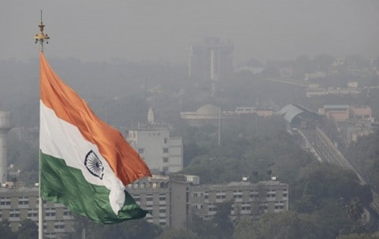

Air, the most important thing to have life on the planet. 
Air pollution has been one of the serious issues in India and hence we are looking here to analyse the different air pollutants of different state and cities of India.	

The data set is of year 1987 to 2015 having concentration of five major air pollutants like SO2,NO2,spm etc.

### 2. Data Loading and Description

Air pollution occurs when harmful or excessive quantities of substances including gases, particles, and biological molecules are introduced into Earth's atmosphere.<br>The Pollutant Standard Index (PSI) is a numerical value and indicator of pollutants that is normally used to facilitate risk assessment. It is a numeric value between zero to 500. The calculation of PSI is based on the concentration of five major air pollutants including particulate matters (PMs), sulphur dioxide (SO2), nitrogen dioxide (NO2), carbon monoxide (CO), and ozone (O3) in the air.

Data consists of all the measures of following 5 important factors in air to analyze the air quality.

__NO2__: Nitrogen Dioxide and is emitted mostly from combustion from power sources or transport. <br>
__SO2__: Sulphur Dioxide and is emitted mostly from coal burning, oil burning, manufacturing of Sulphuric acid.<br>
__spm__: Suspended particulate matter and are known to be the deadliest form of air pollution. They are microscopic in nature and are found to be suspended in earth's atmosphere.<br>
__rspm__: Respirable suspended particulate matter. A sub form of spm and are responsible for respiratory diseases.<br>
__pm2_5__: Suspended particulate matter with diameters less than 2.5 micrometres. They tend to remain suspended for longer durations and potentially very harmful.<br>

__Dataset info__  <br>
Number of variables : 13  <br>
Number of observations : 435742  <br>
Total Missing : 19.1% 

__Data has all the pollutant levels for different states and cities which can be analyzed to get better insight of air pollution in India.__

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Read the file
dfAirData = pd.read_csv('F:\DS Insaid\Term 1 Project\india-air-quality-data\AirQualityData.csv',encoding='ISO-8859-1',
                        dtype = {'stn_code':str,'sampling_date':str})
dfAirData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


In [2]:
dfAirData.drop(['stn_code', 'sampling_date'], axis=1,inplace = True) # remove irrelevant columns
dfAirData.head(5)

,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [3]:
profile = pp.ProfileReport(dfAirData)
profile.to_file(outputfile="IndiaAirQuality.html")

### 3. Data Profiling

In [4]:
# Deeper look into the data
dfAirData.type = dfAirData.type.astype(str)
dfAirData.location = dfAirData.location.astype(str)
dfAirData.agency = dfAirData.agency.astype(str)

typeCol = dfAirData['type'].unique()
typeCol.sort()
#print(typeCol)

stateCol = dfAirData['state'].unique()
stateCol.sort()
#print(stateCol)

locationCol = dfAirData['location'].unique()
locationCol.sort()
#print(locationCol)

- Dealing with 3 important fields <br/>
    - Values of __type__ are having duplicates which need to be replaced <br/>
    - Replacing __state__ with correct name which are mis-spelled. <br/>
    - The column __location__ having some old name of cities which can be replaced with new name to avoid dupiacte records of same city.

In [5]:
# Replacing values which are similar and like duplicates

# Handle 'type' columns
dfAirData.type.replace(['Industrial Area' , 'Industrial Areas'], ['Industrial', 'Industrial'], inplace=True)
dfAirData['type'].replace({'Sensitive Area':'Sensitive','Sensitive Areas':'Sensitive'},inplace = True)
dfAirData.replace({'type': r'^RIR.*'}, {'type': 'Residential, Rural and other Areas'},inplace = True,regex=True)

# Handle 'state' columns
dfAirData['state'].replace({'Uttaranchal':'Uttarakhand'},inplace = True)

# Handle 'location' columns
dfAirData['location'].replace({'Ankleshwar':'Anklesvar','Bhubaneshwar':'Bhubaneswar','Bombay':'Mumbai', 'Calcutta':'Kolkata', 
'Madras':'Chennai','Dehradoon':'Dehradun','Durgapur (WB)':'Durgapur','Gajraula':'Gajroula','HALDIA':'Haldia',
'Pondicherry':'Pondichery','Silcher':'Silchar','Trivendrum':'Thiruvananthapuram','Trivandrum':'Thiruvananthapuram', 
'Turicorin':'Thoothukudi','Tuticorin':'Thoothukudi','VAPI':'Vapi','Vishakhapatnam':'Visakhapatnam',
'Yamuna Nagar':'Yamunanagar'},inplace = True)

- Dealing with State field <br/>
    - Few Values of __location__ are NA and values of other columns are also NA so can be removed <br/>
    - Replacing __state__ with correct name : there were State division and hence location here need to be moved from old state to new one. <br/>

In [6]:
# removed rows having location as NaN since other fields are also NaN
dfAirData.loc[dfAirData['location'].isnull()]
dfAirData.dropna(subset=['location'],inplace = True)  

# Replacing state name of cities with old state name to new name
dfAirData['state'] = np.where(dfAirData['location'] == 'Bhilai','Chhattisgarh',dfAirData['state'])
dfAirData['state'] = np.where(dfAirData['location'] == 'Daman','Daman & Diu',dfAirData['state'])
dfAirData['state'] = np.where(dfAirData['location'] == 'Dehradun','Uttarakhand',dfAirData['state'])
dfAirData['state'] = np.where(dfAirData['location'] == 'Dhanbad','Jharkhand',dfAirData['state'])
dfAirData['state'] = np.where(dfAirData['location'] == 'Hyderabad','Telangana',dfAirData['state'])
dfAirData['state'] = np.where(dfAirData['location'] == 'Jamshedpur','Jharkhand',dfAirData['state'])
dfAirData['state'] = np.where(dfAirData['location'] == 'Jharia','Jharkhand',dfAirData['state'])
dfAirData['state'] = np.where(dfAirData['location'] == 'Karimnagar','Telangana',dfAirData['state'])
dfAirData['state'] = np.where(dfAirData['location'] == 'Khammam','Telangana',dfAirData['state'])
dfAirData['state'] = np.where(dfAirData['location'] == 'Korba','Chhattisgarh',dfAirData['state'])
dfAirData['state'] = np.where(dfAirData['location'] == 'Nalgonda','Telangana',dfAirData['state'])
dfAirData['state'] = np.where(dfAirData['location'] == 'Patancheru','Telangana',dfAirData['state'])
dfAirData['state'] = np.where(dfAirData['location'] == 'Raipur','Chhattisgarh',dfAirData['state'])
dfAirData['state'] = np.where(dfAirData['location'] == 'Ramagundam','Telangana',dfAirData['state'])
dfAirData['state'] = np.where(dfAirData['location'] == 'Sangareddy','Telangana',dfAirData['state'])
dfAirData['state'] = np.where(dfAirData['location'] == 'Sindri','Jharkhand',dfAirData['state'])
dfAirData['state'] = np.where(dfAirData['location'] == 'Warangal','Telangana',dfAirData['state'])

In [7]:
dfAirData.info()
dfAirData.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435742 entries, 0 to 435741
Data columns (total 11 columns):
state                          435742 non-null object
location                       435742 non-null object
agency                         435742 non-null object
type                           435742 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(6)
memory usage: 39.9+ MB


,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


- Handle categorical missing values
    - Few Values of __Agency__ are NA for given state and location , however there are values present for other rows. Hence NA can be replaced with mode of the field

In [8]:
dfAirData['agency'] = dfAirData.groupby(['state','location'])['agency'].apply(lambda x: x.fillna(x.mode()[0]) if x.mode().empty == False else x.fillna('NA'))

dfAirData['agency'] = dfAirData.groupby(['state'])['agency'].apply(lambda x: x.fillna(x.mode()[0]) if x.mode().empty == False else x.fillna('NA'))

In [9]:
dfAirData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435742 entries, 0 to 435741
Data columns (total 11 columns):
state                          435742 non-null object
location                       435742 non-null object
agency                         435742 non-null object
type                           435742 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(6)
memory usage: 39.9+ MB


In [10]:
# type column is having few NA values and there are common values for type as 'Residential, Rural and other Areas'
dfAirData['type'] = dfAirData['type'].fillna('Residential, Rural and other Areas')

- Replacing missing value of pollutant with mean 
    - so2,no2,rspm,spm,pm2_5

In [11]:
dfAirData['so2'] = dfAirData.groupby(['state','location'])['so2'].apply(lambda x: x.fillna(x.mean()))
dfAirData['no2'] = dfAirData.groupby(['state','location'])['no2'].apply(lambda x: x.fillna(x.mean()))
dfAirData['rspm'] = dfAirData.groupby(['state','location'])['rspm'].apply(lambda x: x.fillna(x.mean()))
dfAirData['spm'] = dfAirData.groupby(['state','location'])['spm'].apply(lambda x: x.fillna(x.mean()))
dfAirData['pm2_5'] = dfAirData.groupby(['state','location'])['pm2_5'].apply(lambda x: x.fillna(x.mean()))

dfAirData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435742 entries, 0 to 435741
Data columns (total 11 columns):
state                          435742 non-null object
location                       435742 non-null object
agency                         435742 non-null object
type                           435742 non-null object
so2                            435651 non-null float64
no2                            435667 non-null float64
rspm                           434165 non-null float64
spm                            394758 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          98987 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(6)
memory usage: 39.9+ MB


### 4. Questions

### 4.1 Which are the top 5 states having highest emmissions of NO2 & SO2 ?

******SO2********
                   so2
state                 
Jharkhand    25.052977
Uttarakhand  22.028094
Sikkim       19.800000
Maharashtra  17.198075
Gujarat      16.628233


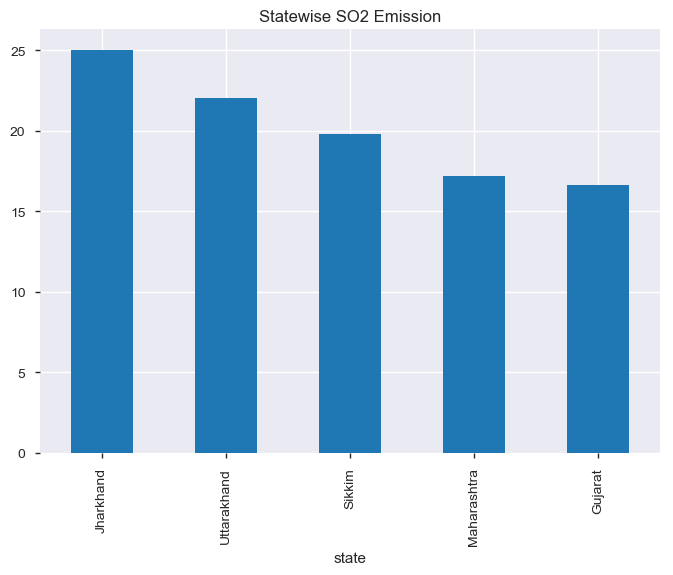

******NO2********
state
West Bengal    59.104335
Delhi          53.489147
Jharkhand      43.450670
Bihar          32.791935
Maharashtra    32.048763
Name: no2, dtype: float64


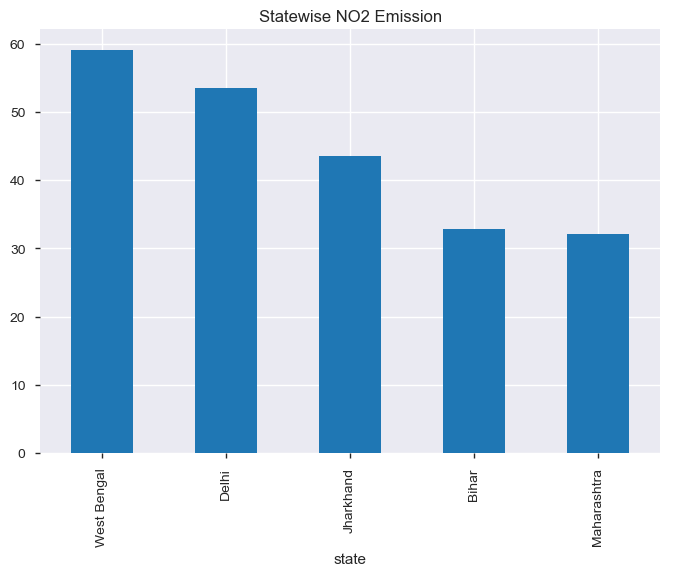

In [12]:
statewise_emissions = dfAirData.groupby('state').mean()[['so2', 'no2', 'rspm', 'spm', 'pm2_5']]

sort_by_so2 = statewise_emissions.sort_values('so2',ascending=False)
top5State_SO2_emission = sort_by_so2.iloc[:5,:1]

top5State_NO2_emission = statewise_emissions.nlargest(5, 'no2')['no2']
top5State_SO2_emission_plot = statewise_emissions.nlargest(5, 'so2')['so2']

print('******SO2********')
print(top5State_SO2_emission)
top5State_SO2_emission_plot.plot(kind = 'bar',x = 'state',title='Statewise SO2 Emission')
plt.show()

print('******NO2********')
print(top5State_NO2_emission)
top5State_NO2_emission.plot(kind = 'bar',x = 'state',title='Statewise NO2 Emission')
plt.show()

### 4.2 What are the suspended particulate matter statewise ?

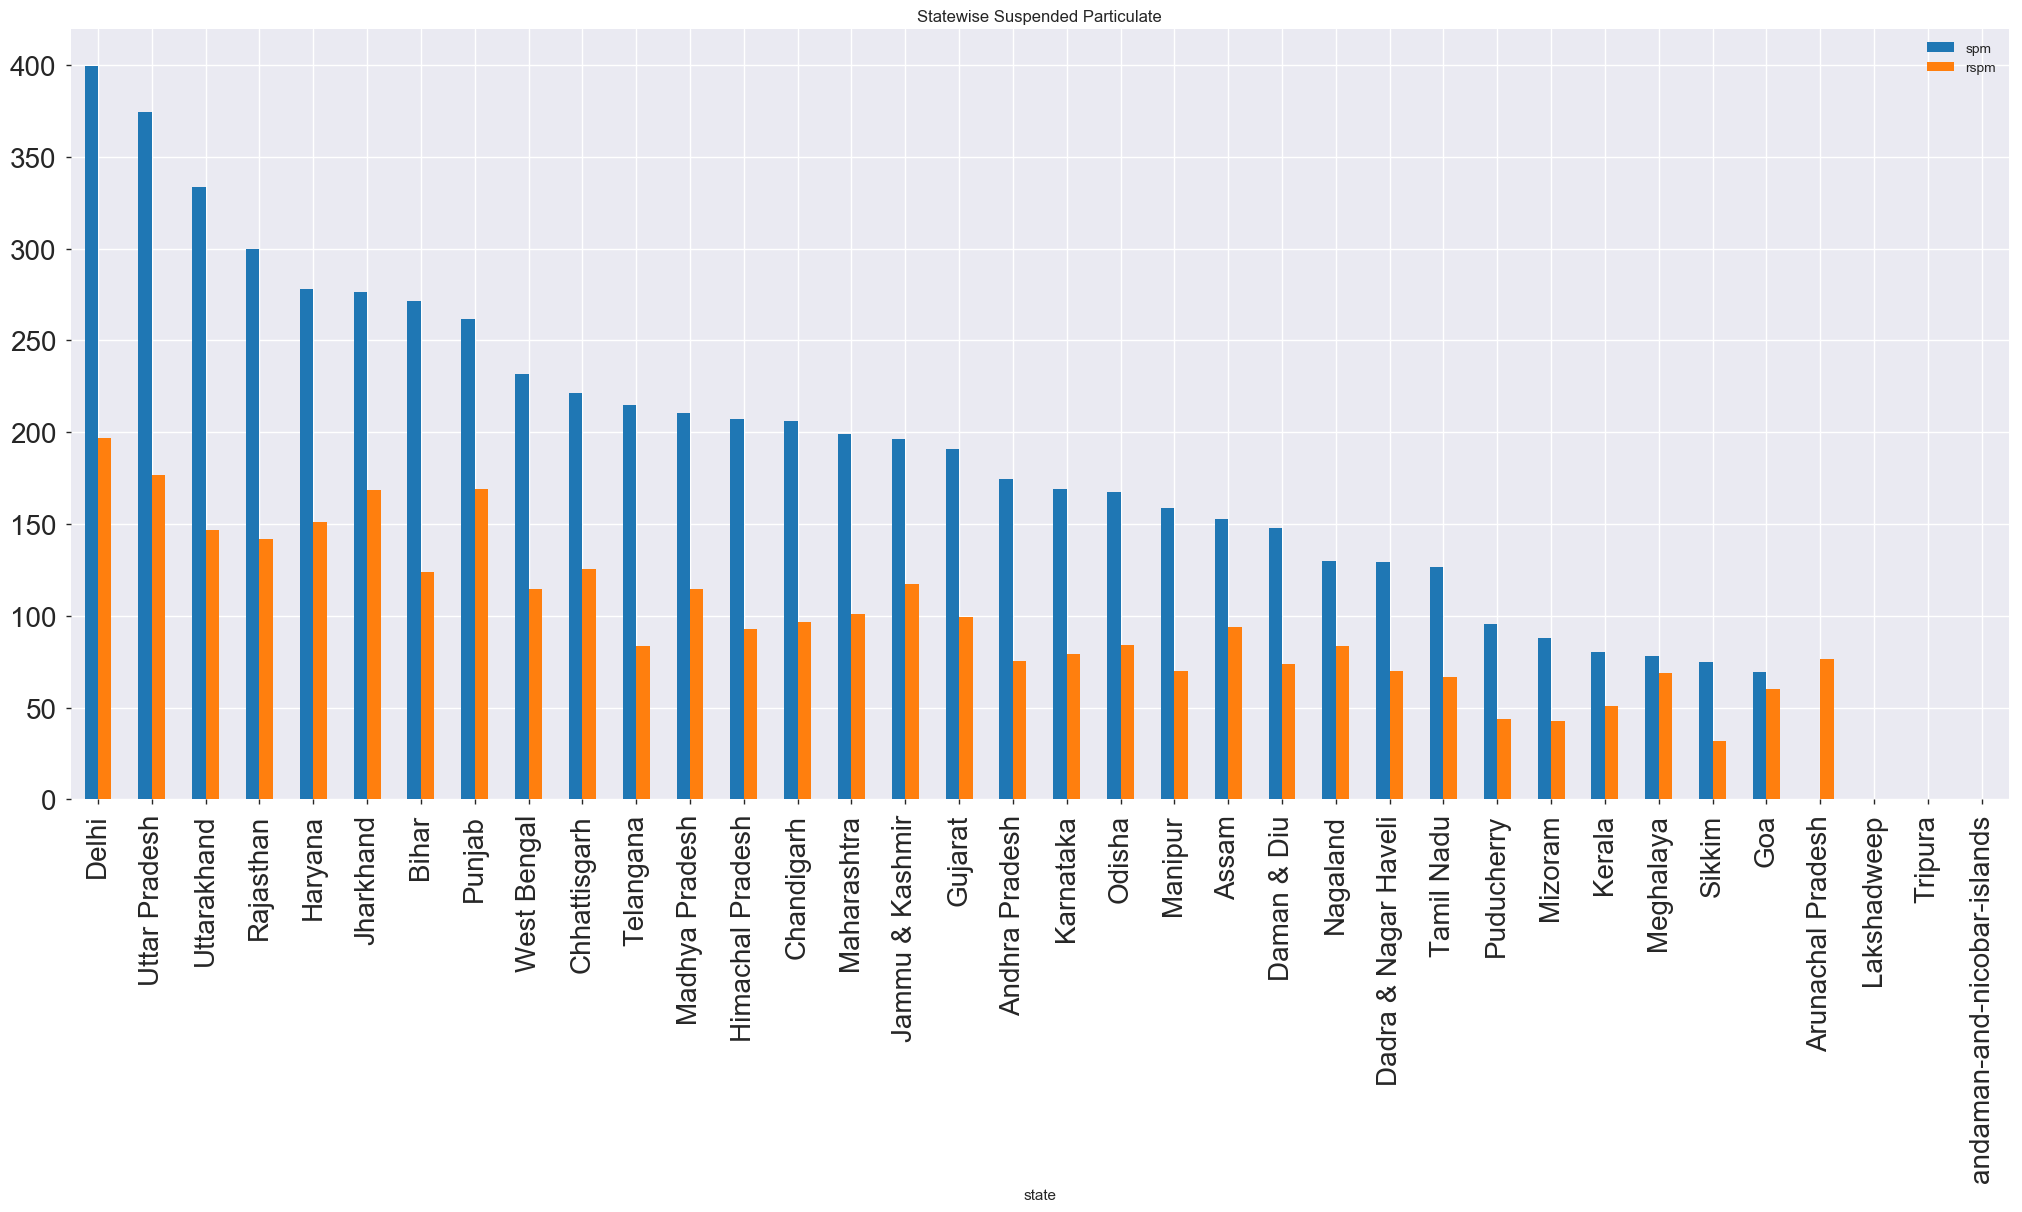

,state,spm,rspm
8,Delhi,399.402088,196.639771
32,Uttar Pradesh,374.272053,176.935898
33,Uttarakhand,333.598833,146.773583
27,Rajasthan,299.591135,141.834266
11,Haryana,277.759906,151.099187


In [13]:
suspendedParticulate = dfAirData[['state', 'spm', 'rspm']].groupby('state').mean()
suspendedParticulate.reset_index(inplace = True)
suspendedParticulate.sort_values('spm', ascending= False, inplace = True)
suspendedParticulate.plot(kind = 'bar', x = 'state',figsize= (25,10),  fontsize= 20, title = 'Statewise Suspended Particulate')
plt.show()
suspendedParticulate.head()

Delhi & UP adding most to SPM and RSPM in air.

### 4.3 What is SO2 & NO2 emission over the years in India ?

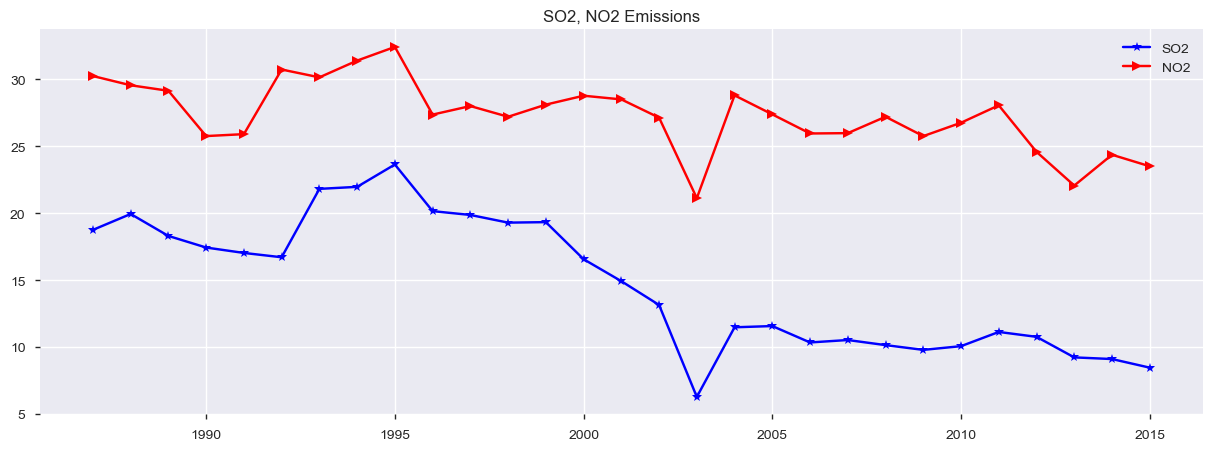

In [14]:
dfAirData['date'] = pd.to_datetime(dfAirData['date'], errors='coerce')
dfAirData['year'] = dfAirData['date'].dt.year

so2_no2_overYears = dfAirData[['year', 'so2', 'no2']].groupby('year').mean()
so2_no2_overYears

x = so2_no2_overYears.index
y = so2_no2_overYears.so2
y1 = so2_no2_overYears.no2
plt.figure(figsize = (15,5))
plt.title("SO2, NO2 Emissions")
plt.plot(x, y, marker = "*", color = 'b', label = 'SO2')
plt.plot(x, y1, marker = ">", color = 'r', label = 'NO2')
plt.legend()
plt.show()

### 4.4 Which type of area is emitting maximum SO2 & NO2 ?

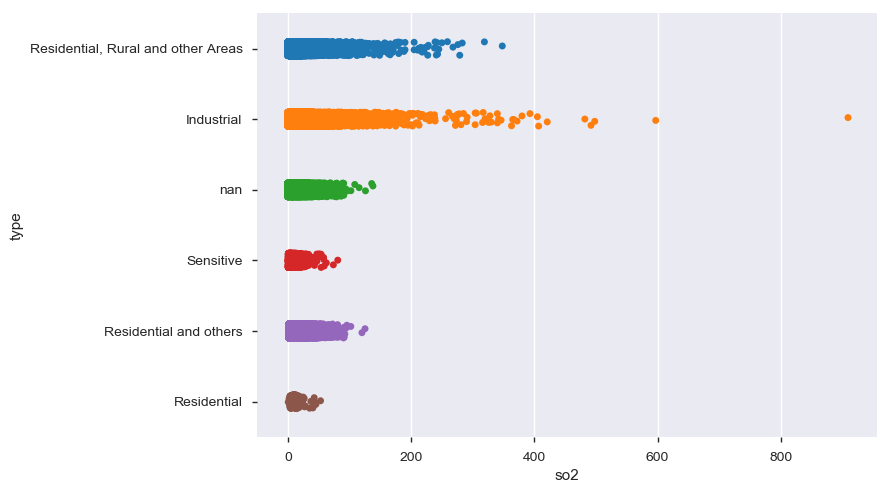

In [15]:
sns.stripplot(x = 'so2',y= 'type',data = dfAirData)

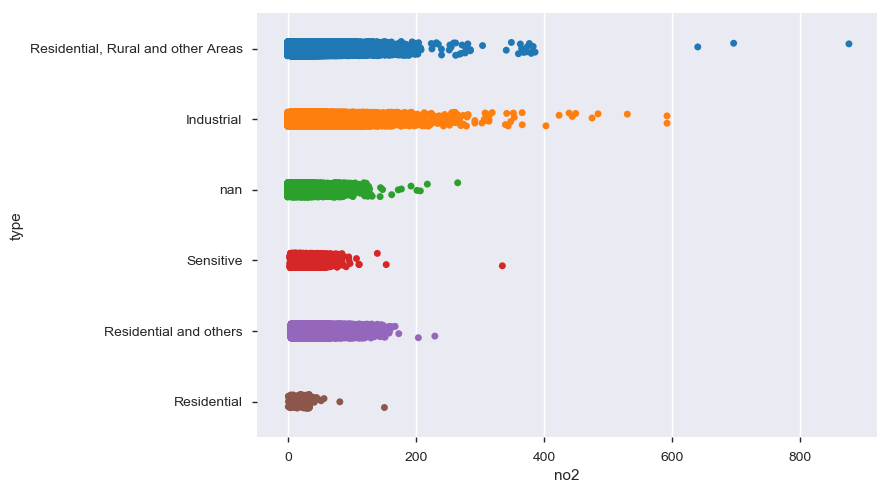

In [16]:
sns.stripplot(x = 'no2',y= 'type',data = dfAirData)

__Industrial area is clearly the major reason behind producing the air pollutant.__

### 4.5 Corelation between pollutant.

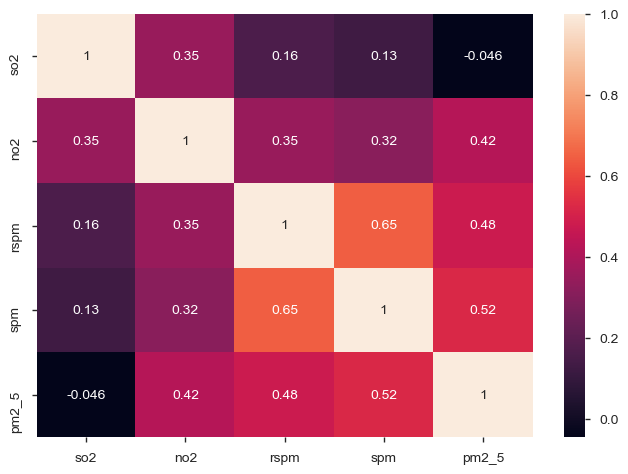

In [23]:
'''corr = dfAirData.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')'''

sns.heatmap(
    dfAirData.loc[:, ['state','so2', 'no2', 'rspm', 'spm', 'pm2_5']].corr(),
    annot=True
)

- One pollutant causing other
    - __NO2__ leading to incraese in level of all pollutant.
    - __SPM__ causes incraes in RSPM and PM2_5 both
    - Correlations shows : spm and rspm having higher interdependency, and then rspm and NO2.

F:\DS Python\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
F:\DS Python\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


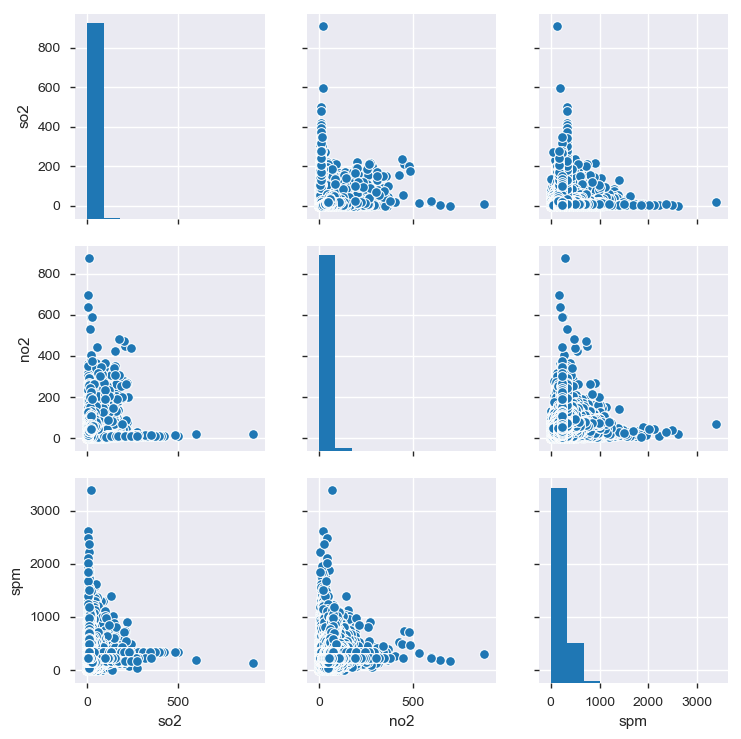

In [24]:
sns.pairplot(dfAirData[['so2','no2','spm']])

spm emmissions does show some relation with No2 and So2 emmissions.<br> As the emmissions for NO2 increase, the spm emmissions increases as well.

### 4.6 NO2  rise in state over the year.

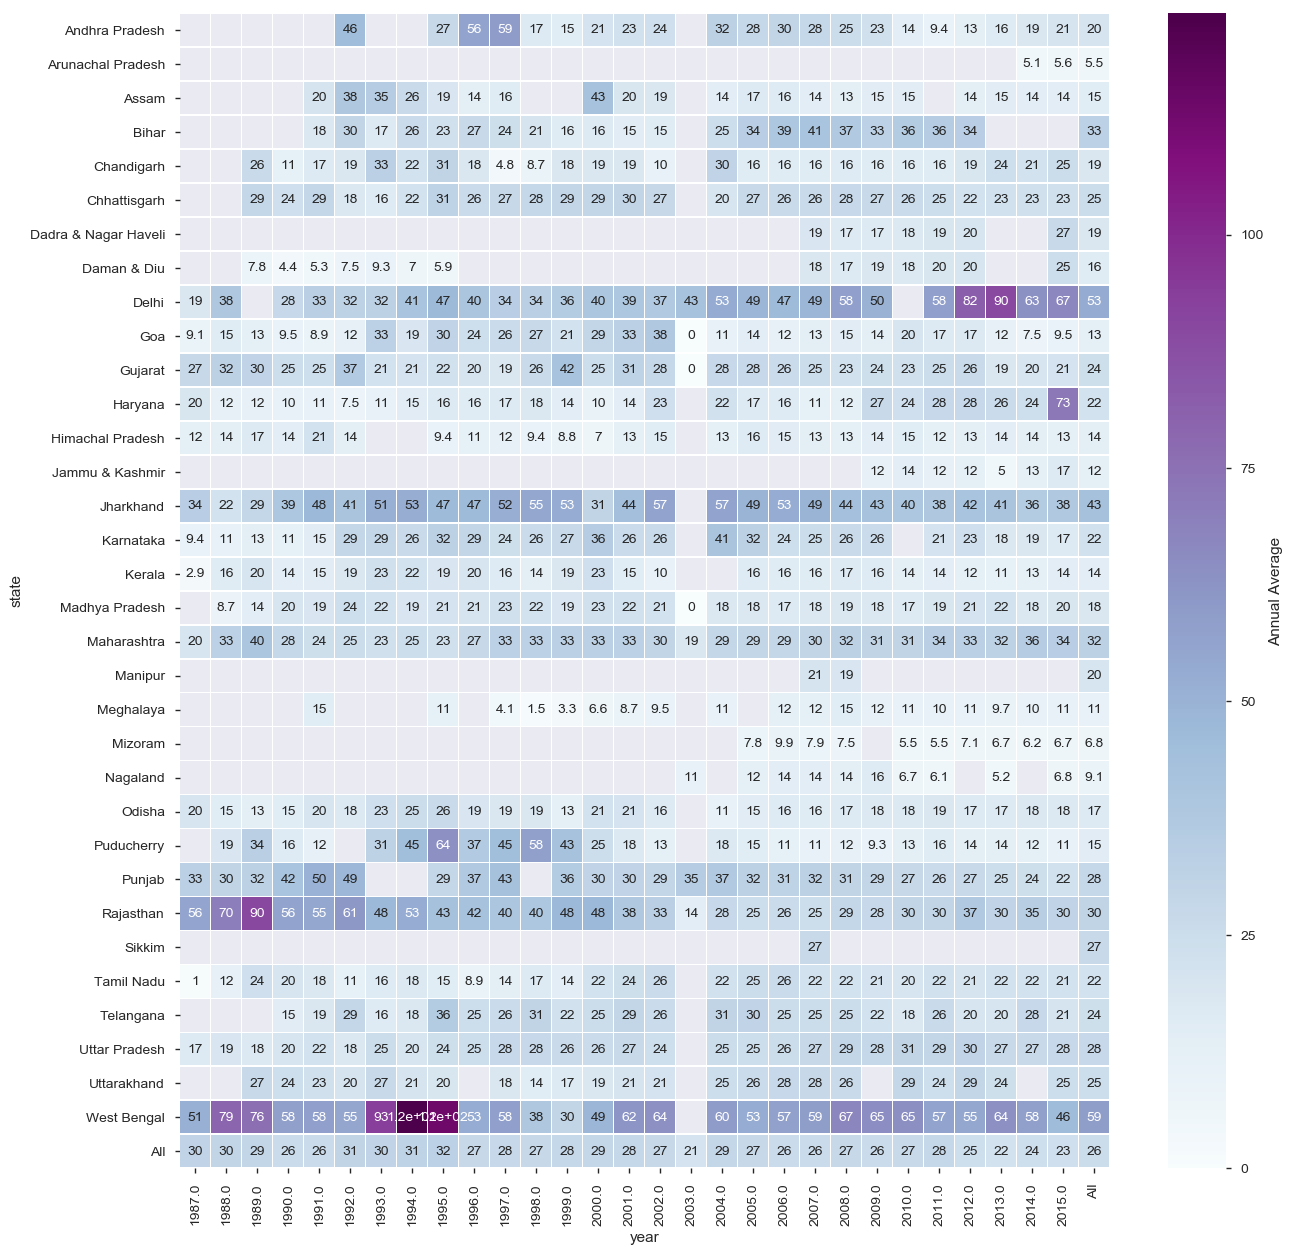

In [18]:
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(dfAirData.pivot_table('no2', index='state',
                columns=['year'],aggfunc='mean',margins=True),
                annot=True,cmap="BuPu", linewidths=.5, cbar_kws={'label': 'Annual Average'})

__North and east states are highly polluted. <br>
South and west states are better to breath and comparatively less polluted to other part of India.__


### 4.7  RSPM and SPM statewise.

******SPM********
state
Delhi            399.402088
Uttar Pradesh    374.272053
Uttarakhand      333.598833
Name: spm, dtype: float64


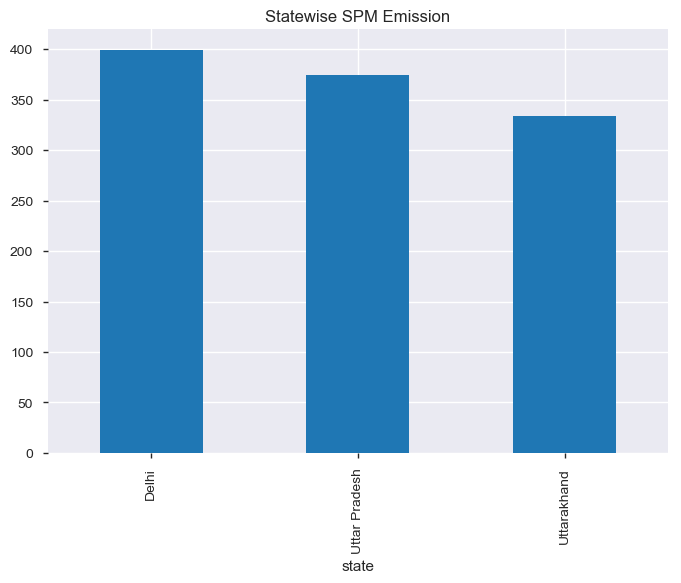

******RSPM********
state
Delhi            196.639771
Uttar Pradesh    176.935898
Punjab           169.125435
Name: rspm, dtype: float64


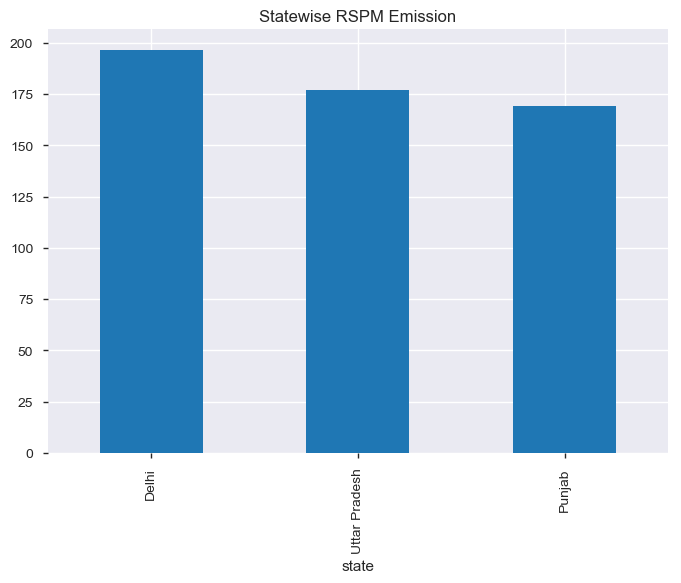

In [28]:
top3State_spm_emission = statewise_emissions.nlargest(3, 'spm')['spm']
top3State_rspm_emission_plot = statewise_emissions.nlargest(3, 'rspm')['rspm']

print('******SPM********')
print(top3State_spm_emission)
top3State_spm_emission.plot(kind = 'bar',x = 'state',title='Statewise SPM Emission')
plt.show()

print('******RSPM********')
print(top3State_rspm_emission_plot)
top3State_rspm_emission_plot.plot(kind = 'bar',x = 'state',title='Statewise RSPM Emission')
plt.show()

- High RSPM and SPM :
    - Delhi , Uttar Pradesh and Punjab states have High RSPM
    - Delhi , Uttar Pradesh and Uttarakhand states have High SPM

### 5.  Conclusions

- North and east states are highly polluted <br>
- South and west states are better to breath and comparatively less polluted to other part of India. <br>
- Industrial area is clearly the major reason behind producing the air pollutant <br>
- Delhi & UP adding most to SPM and RSPM in air. <br>
- Jharkhand and Maharashtra emitting SO2 and NO2 most in India. <br>